**Bike Sharing**

[Sumber data Bike Sharing](https://drive.google.com/file/d/1lSbp2GTSgE8jwvA2K8rlLRZIUTWNNfXe/view) 

### **Contents**

1. Business Problem Understanding
2. Data Understanding
3. Data Preprocessing
4. Modeling
5. Conclusion
6. Recommendation

****

### **Business Problem Understanding**

**Context**

Sistem Bike-sharing merupakan generasi baru dari rental sepeda dimana seluruh proses dari keanggotaan, penyewaan, dan pengembalian telah dilakukan secara otomatis. Melalui sistem ini, pengguna dapat dengan mudah menyewa sepeda dari tempat tertentu dan mengembalikannya di tempat lain.

Sebuah perusahaan penyedia bike-sharing sedang mengembangkan bisnisnya dan berusaha untuk meningkatkan pendapatan yang dimiliki. Oleh karena itu, perusahaan memutuskan untuk menyiapkan sebuah strategi bisnis yang tepat untuk meningkatkan pendapatannya. Dalam menyiapkan hal tersebut, perusahaan ingin memahami mengenai permintaan masyarakat terhadap rental sepeda. Dengan memahami hal tersebut, perusahaan berencana untuk mempersiapkan diri untuk memenuhi kebutuhan masyarakat.

Perusahaan melakukan kontrak dengan perusahaan konsultan pada bidang data untuk mengetahui faktor-faktor yang mempengaruhi permintaan terhadap rental sepeda, secara khusus di Amerika. Perusahaan ingin mengetahui variabel yang signifikan dalam memprediksi permintaan rental sepeda dan seberapa baik variabel tersebut menjelaskan permintaan terhadap rental sepeda. Perusahaan juga ingin mengetahui jumlah sepeda yang harus disiapkan dengan tepat sesuai dengan kebutuhan masyarakat pada berbagai kondisi cuaca.

**Problem Statement**

Dalam membuat strategi bisnis yang tepat untuk meningkatkan pendapatan, perusahaan perlu memahami faktor-faktor apa saja yang mempengaruhi permintaan rental sepeda. Selain itu, untuk mendapatkan pendapatan yang maksimal, perusahaan perlu untuk menyediakan jumlah sepeda yang tepat sesuai dengan kebutuhan masyarakat. Apabila jumlah sepeda terlalu sedikit, maka perusahaan akan kehilangan potensi pendapatan. Di sisi lain, apabila jumlah sepeda terlalu banyak, perusahan akan mengalami kerugian.

**Goals**

Berdasarkan permasalahan tersebut, perusahaan memerlukan 'tool' yang dapat membantu mereka dalam menentukan jumlah sepeda yang dibutuhkan dalam berbagai kondisi cuaca yang sedang terjadi.

**Analytic Approach**

Jadi, yang akan dilakukan adalah menganalisis data untuk dapat menemukan pola dari fitur-fitur yang ada dalam menentukan jumlah penyewa sepeda pada berbagai kondisi cuaca.

Selanjutnya, kita akan membangun suatu model regresi yang akan membantu perusahaan untuk dapat menyediakan 'tool' prediksi jumlah penyewa sepeda yang akan membantu perusahaan dalam menentukan jumlah sepeda yang dibutuhkan serta tren penyewa sepeda pada kondisi tertentu.

**Metric Evaluation**

Evaluasi metrik yang akan digunakan adalah RMSE, MAE, dan MAPE, di mana RMSE adalah nilai rataan akar kuadrat dari error, MAE adalah rataan nilai absolut dari error, sedangkan MAPE adalah rataan persentase error yang dihasilkan oleh model regresi. Semakin kecil nilai RMSE, MAE, dan MAPE yang dihasilkan, berarti model semakin akurat dalam memprediksi jumlah rental sepeda sesuai dengan limitasi fitur yang digunakan.


### **Data Understanding**


*   Dataset merupakan data jumlah penyewaan sepeda pada tahun 2011-2012 di Amerika
*   Setiap baris data merepresentasikan informasi terkait penyewaan sepeda per hari

**Attributes Information**

| **Attribute** | **Data Type** | **Description** |
| --- | --- | --- |
| dteday | Datetime | date |
| hum | Float | Normalized humidity. The values are divided to 100 (max) |
| weathersit | Integer |  weather  <br>1 =  Clear, Few clouds, Partly cloudy, Partly cloudy<br>2 = Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist<br>3 = Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain +   Scattered clouds<br>4 = Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog|
| holiday | Integer | holiday or not |
| season | Integer | season <br>1: winter<br>2: spring<br>3: summer<br>4: fall |
| atemp | Float | Normalized feeling temperature in Celsius. The values are derived via (t-tmin)/(tmax-tmin), tmin=-16, t_max=+50 (only in hourly scale) |
| temp | Float | Normalized temperature in Celsius. The values are derived via (t-tmin)/(tmax-tmin), tmin=-8, t_max=+39 (only in hourly scale) |
| hr | Integer | hour (0 to 23) |
| casual | Integer | count of casual users |
| registered | Integer | count of registered users |
| cnt | Integer | count of total rental bikes including both casual and registered |




In [1]:
# Import library yang dibutuhkan untuk eksplorasi dataset
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [60]:
# Load Dataset
df = pd.read_csv('data_bike_sharing.csv')
df.head()

,dteday,hum,weathersit,holiday,season,atemp,temp,hr,casual,registered,cnt
0,2011-12-09,0.62,1,0,4,0.3485,0.36,16,24,226,250
1,2012-06-17,0.64,1,0,2,0.5152,0.54,4,2,16,18
2,2011-06-15,0.53,1,0,2,0.6212,0.62,23,17,90,107
3,2012-03-31,0.87,2,0,2,0.3485,0.36,8,19,126,145
4,2012-07-31,0.55,1,0,3,0.6970,0.76,18,99,758,857


**Data Manipulation**

In [61]:
#Convert data type 'dteday' menjadi date time

df['dteday'] = pd.to_datetime(df['dteday'])

In [62]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12165 entries, 0 to 12164
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   dteday      12165 non-null  datetime64[ns]
 1   hum         12165 non-null  float64       
 2   weathersit  12165 non-null  int64         
 3   holiday     12165 non-null  int64         
 4   season      12165 non-null  int64         
 5   atemp       12165 non-null  float64       
 6   temp        12165 non-null  float64       
 7   hr          12165 non-null  int64         
 8   casual      12165 non-null  int64         
 9   registered  12165 non-null  int64         
 10  cnt         12165 non-null  int64         
dtypes: datetime64[ns](1), float64(3), int64(7)
memory usage: 1.0 MB


In [64]:
#Menambahkan feature nama hari
df['weekday'] = df['dteday'].dt.day_of_week

#Menambahkan feature bulan
df['month'] = df['dteday'].dt.month

#Menambahkan feature tahun
df['year'] = df['dteday'].dt.year

#Merubah tipe data
df['weekday'] = df['weekday'].astype('category')
df['weathersit'] = df['weathersit'].astype('category')
df['season'] = df['season'].astype('category')

#### **Exploratory Data Analysis (EDA)**

**Distribution of Count Rental Bikes**

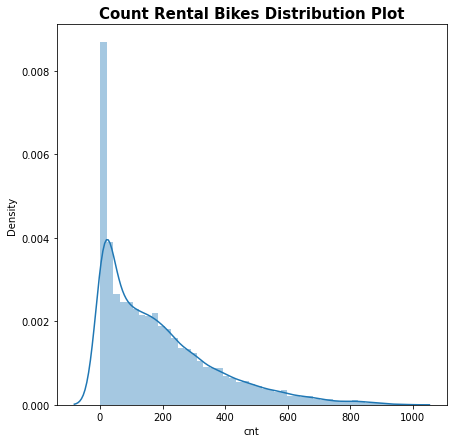

In [65]:
# Plot distribusi fitur 'cnt'
plt.figure(figsize=(7, 7))
sns.distplot(df['cnt'])
plt.title('Count Rental Bikes Distribution Plot', size=15, weight='bold');

Berdasarkan plot distribusi jumlah rental sepeda di atas, terlihat bahwa terdapat 'Right-skewed distribution' yang berarti terdapat skewness positif pada fitur 'cnt'.

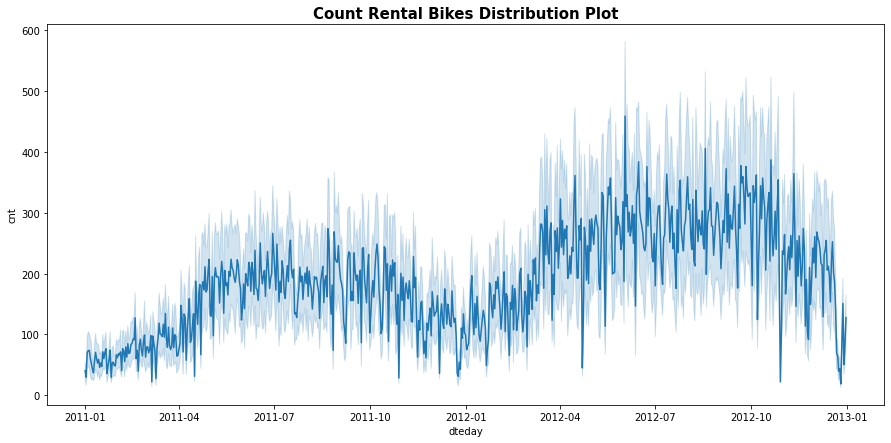

In [184]:
# Plot Distribusi rental sepeda berdasarkan waktu
plt.figure(figsize=(15, 7))
sns.lineplot(data = df, x = 'dteday', y = 'cnt')
plt.title('Count Rental Bikes Distribution Plot', size=15, weight='bold');

Berdasarkan lineplot di atas, diketahui bahwa jumlah rental sepeda mengalami peningkatan seiring berjalannya waktu, serta terdapat pola pada bulan-bulan tertentu dimana jumlah rental sepeda akan meningkat dan menurun.

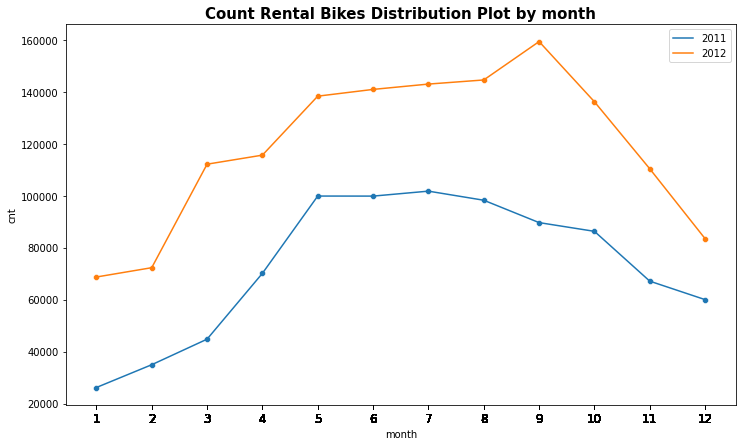

In [180]:
# Plot Distribusi rental sepeda berdasarkan bulan
df2 = df.copy()
df2['month'] = df2['dteday'].dt.month
df2['year'] = df2['dteday'].dt.year

df2_2011 = df2[df2['year']==2011].groupby('month')
df2_2012 = df2[df2['year']==2012].groupby('month')

plt.figure(figsize=(12, 7))
sns.lineplot(data = df2_2011.sum(), x = 'month', y = 'cnt')
sns.lineplot(data = df2_2012.sum(), x = 'month', y = 'cnt')
plt.legend(['2011', '2012'])

sns.scatterplot(data = df2_2011.sum(), x = 'month', y = 'cnt')
sns.scatterplot(data = df2_2012.sum(), x = 'month', y = 'cnt')
plt.xticks(df2['month'], size = 12)

plt.title('Count Rental Bikes Distribution Plot by month', size=15, weight='bold');

Berdasarkan grafik di atas dapat dilihat bahwa mulai dari bulan maret menuju pertengahan tahun jumlah rental sepeda akan meningkat dan kembali menurun pada bulan oktober hingga akhir tahun.

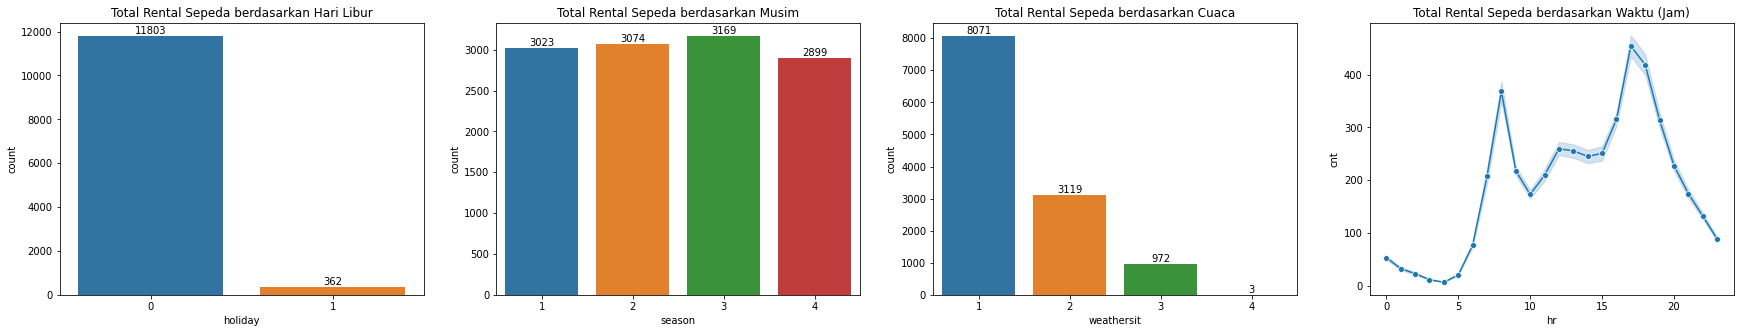

In [138]:
# Total Rental Sepeda berdasarkan holiday
plt.figure(figsize = (30,5))
plt.subplot(1,4,1)
ax = sns.countplot(df['holiday'])
ax.bar_label(ax.containers[0])
plt.title('Total Rental Sepeda berdasarkan Hari Libur', size = 12)

# Total Rental Sepeda berdasarkan season
plt.subplot(1,4,2)
ax = sns.countplot(df['season'])
ax.bar_label(ax.containers[0])
plt.title('Total Rental Sepeda berdasarkan Musim', size = 12)

# Total Rental Sepeda berdasarkan weather
plt.subplot(1,4,3)
ax = sns.countplot(df['weathersit'])
ax.bar_label(ax.containers[0])
plt.title('Total Rental Sepeda berdasarkan Cuaca', size = 12)

# Total Rental Sepeda berdasarkan jam
plt.subplot(1,4,4)
sns.lineplot(data=df, x='hr', y='cnt', marker='o')
plt.title('Total Rental Sepeda berdasarkan Waktu (Jam)', size = 12)

plt.show()

Berdasarkan grafik di atas, dapat dilihat bahwa penyewaan sepeda lebih banyak ketika bukan hari libur, cuaca yang cerah, dan pada jam-jam tertentu seperti jam 8 pagi dan jam 5-6 sore. Di sisi lain, berdasarkan musim, jumlah rental sepeda tertinggi berada pada musim panas, walaupun perbedaan pada setiap musim tersebut tidak signifikan.

### **Data Preprocessing**

Pada tahap ini, kita akan melakukan cleaning pada data yang nantinya data yang sudah dibersihkan akan kita gunakan untuk proses analisis selanjutnya. Beberapa hal yang perlu dilakukan adalah:
- Drop fitur yang tidak memiliki relevansi terhadap permasalahan yang sedang dihadapi.
- Melakukan treatment terhadap missing value jika ada. Bisa dengan cara men-drop fiturnya jika memang tidak dibutuhkan atau bisa juga dengan mengimputasi dengan nilai yang paling masuk akal berdasarkan kasusnya.

Untuk proses data preprocessing dan feature engineering, kita akan menggunakan dataframe hasil duplikasi dari dataframe yang sebelumnya digunakan.

In [68]:
# Membuat duplikasi dataframe
df_model = df.copy()

In [69]:
# Cek info lebih detail untuk setiap fitur
listItem = []

for col in df_model.columns:
    listItem.append([col, df_model[col].dtype, df_model[col].isna().sum(), round((df_model[col].isna().sum()/len(df_model[col]))*100, 2),
                    df_model[col].nunique(), list(df_model[col].drop_duplicates().sample(2).values)]);

df_model_desc = pd.DataFrame(columns=['dataFeatures', 'dataType', 'null', 'nullPct', 'unique', 'uniqueSample'],
                     data=listItem)
df_model_desc

,dataFeatures,dataType,null,nullPct,unique,uniqueSample
0,dteday,datetime64[ns],0,0.0,731,"[2012-03-22T00:00:00.000000000, 2012-11-21T00:..."
1,hum,float64,0,0.0,89,"[0.53, 0.16]"
2,weathersit,category,0,0.0,4,"[3, 1]"
3,holiday,int64,0,0.0,2,"[0, 1]"
4,season,category,0,0.0,4,"[4, 2]"
5,atemp,float64,0,0.0,65,"[0.0303, 0.4091]"
6,temp,float64,0,0.0,50,"[0.9, 0.78]"
7,hr,int64,0,0.0,24,"[6, 8]"
8,casual,int64,0,0.0,305,"[28, 130]"
9,registered,int64,0,0.0,742,"[26, 420]"


Berdasarkan data di atas, diketahui bahwa tidak terdapat missing value.

In [70]:
# Cek data duplikat
df_model.duplicated().sum()

0

Berdasarkan data di atas, diketahui bahwa tidak terdapat data yang terduplikat.

**Drop Columns**

Tentu perlu ada pertimbangan sebelum melakukan drop pada kolom atau fitur. Sebagai pertimbangan, pada tahap awal ini kita bisa menggunakan domain knowledge untuk memutuskan kira-kira fitur mana saja yang dirasa tidak memiliki relevansi.
- Jika ditinjau berdasar domain knowledge, fitur 'casual' dan 'registered' merupakan angka pengguna biasa dan pengguna baru. Angka tersebut dijumlahkan dan menjadi fitur 'cnt'. Karena 'cnt' telah mewakili total pengguna rental sepeda, maka fitur 'casual' dan 'registered' tidak diperlukan.
- fitur 'dteday' menggambarkan tanggal, fitur ini tidak memiliki relevansi dengan model regresi yang akan dibuat, sehingga fitur ini akan dihapus. 


In [71]:
# Drop beberapa kolom yang tidak diperlukan
df_model.drop(['dteday', 'casual', 'registered'], axis=1 , inplace = True)

In [72]:
# Cek info dataset
df_model.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12165 entries, 0 to 12164
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   hum         12165 non-null  float64 
 1   weathersit  12165 non-null  category
 2   holiday     12165 non-null  int64   
 3   season      12165 non-null  category
 4   atemp       12165 non-null  float64 
 5   temp        12165 non-null  float64 
 6   hr          12165 non-null  int64   
 7   cnt         12165 non-null  int64   
 8   weekday     12165 non-null  category
 9   month       12165 non-null  int64   
 10  year        12165 non-null  int64   
dtypes: category(3), float64(3), int64(5)
memory usage: 796.8 KB


Sekarang kolom 'dteday', 'casual', dan 'registered' sudah tidak ada.

In [73]:
# Cek deskriptif statistik fitur numerikal
num_features = [feature for feature in df_model.columns if ((df_model[feature].dtypes != 'object'))]
df_model[num_features].describe()

,hum,holiday,atemp,temp,hr,cnt,month,year
count,12165.000000,12165.000000,12165.000000,12165.000000,12165.000000,12165.000000,12165.000000,12165.000000
mean,0.625451,0.029758,0.476996,0.498185,11.519770,189.271023,6.510974,2011.501932
std,0.192102,0.169925,0.171857,0.192492,6.931872,181.223903,3.433995,0.500017
min,0.000000,0.000000,0.000000,0.020000,0.000000,1.000000,1.000000,2011.000000
25%,0.470000,0.000000,0.333300,0.340000,6.000000,40.000000,4.000000,2011.000000
50%,0.620000,0.000000,0.484800,0.500000,12.000000,142.000000,7.000000,2012.000000
75%,0.780000,0.000000,0.621200,0.660000,18.000000,282.000000,9.000000,2012.000000
max,1.000000,1.000000,1.000000,1.000000,23.000000,970.000000,12.000000,2012.000000


Berdasarkan data di atas, tidak ada fitur yang memiliki nilai negatif.

Pada fitur 'hum' terdapat nilai minimum 0. Hal tersebut dirasa tidak masuk akal karena tidak mungkin terjadi tingkat kelembapan sebesar 0%. Oleh karena itu, data yang memiliki nilai 'hum' = 0 lebih baik kita drop.

In [74]:
# Cek humidity yang bernilai 0
df_model[df_model['hum']==0.0]['hum'].count()

14

In [75]:
# Drop data dengan humidity yang bernilai 0
df_model = df_model[(df_model['hum'] != 0)]

In [76]:
# Cek kembali dataset info
df_model.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 12151 entries, 0 to 12164
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   hum         12151 non-null  float64 
 1   weathersit  12151 non-null  category
 2   holiday     12151 non-null  int64   
 3   season      12151 non-null  category
 4   atemp       12151 non-null  float64 
 5   temp        12151 non-null  float64 
 6   hr          12151 non-null  int64   
 7   cnt         12151 non-null  int64   
 8   weekday     12151 non-null  category
 9   month       12151 non-null  int64   
 10  year        12151 non-null  int64   
dtypes: category(3), float64(3), int64(5)
memory usage: 890.7 KB


**Data Correlation**

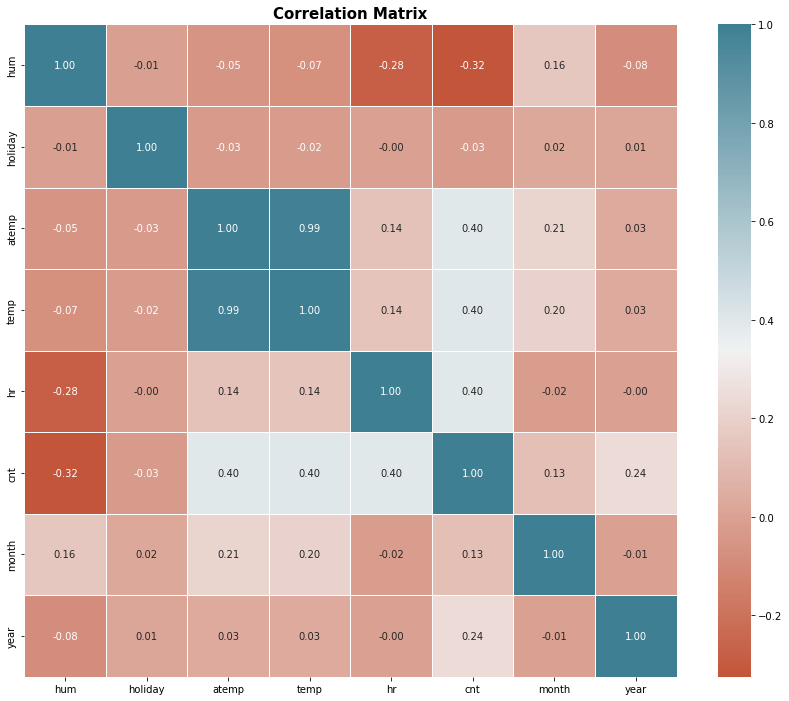

In [77]:
# Correlation matrix
plt.figure(figsize=(15, 12))
palette=sns.diverging_palette(20, 220, n=256)
corr = df_model.corr(method='pearson')
sns.heatmap(corr, annot=True, fmt='.2f', cmap=palette, square=True, linewidths=.5)
plt.title('Correlation Matrix', size=15, weight='bold');

Correlation matrix menunjukkan bahwa tidak ada fitur yang memiliki korelasi yang kuat terhadap fitur cnt. Korelasi paling tinggi dimiliki oleh fitur 'atemp', 'temp', 'hr' di mana korelasinya adalah korelasi positif. Ini berarti semakin ke tinggi temperature dan semakin tinggi jam maka jumlah rental sepeda akan meningkat.

Pada grafik di atas juga terlihat bahwa 'atemp' berkorelasi tinggi dengan 'temp'. Oleh karena itu salah satu fitur akan di-drop, yaitu fitur 'atemp'.

In [78]:
# Drop Feature 'atemp'
df_model.drop(['atemp'], axis=1 , inplace = True)
df_model.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 12151 entries, 0 to 12164
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   hum         12151 non-null  float64 
 1   weathersit  12151 non-null  category
 2   holiday     12151 non-null  int64   
 3   season      12151 non-null  category
 4   temp        12151 non-null  float64 
 5   hr          12151 non-null  int64   
 6   cnt         12151 non-null  int64   
 7   weekday     12151 non-null  category
 8   month       12151 non-null  int64   
 9   year        12151 non-null  int64   
dtypes: category(3), float64(2), int64(5)
memory usage: 795.8 KB


Selanjutnya, kita akan mengecek distribusi data dan outliers untuk tiap numerikal fitur. Jika distribusinya memiliki skewness yang tinggi, salah satu cara yang dapat kita lakukan untuk menguranginya adalah dengan melakukan rekayasa pada tiap fiturnya.

**Outliers Detection**

Banyaknya outliers pada data tentu akan memengaruhi hasil analisis dan pemodelan yang dilakukan. Ada beberapa hal yang harus dipertimbangkan sebelum memutuskan treatment yang sesuai dengan data, di antaranya adalah dengan mempertimbangkan sisi domain knowledge.

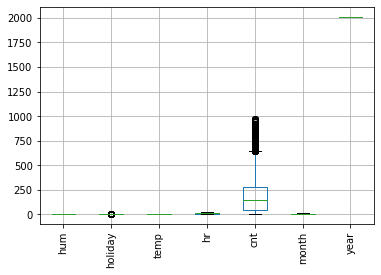

In [79]:
# Plot boxplot untuk mengecek outliers
df_model.boxplot(rot=90);

Terlihat terdapat outliers pada fitur 'cnt. Dalam project ini, untuk membuat dataset yang lebih bersih dari outliers, saya akan melakukan beberapa rekayasa data pada fitur-fitur dengan mempertimbangkan kombinasi antara hasil dari metode IQR dan juga domain knowledge. Nantinya, model yang dihasilkan hanya terbatas dapat memprediksi jumlah rental sepeda yang nilai-nilainya pada rentang data berdasarkan 'clean dataset' ini saja. Di luar rentang data, hasil prediksi dari model akan menjadi bias.

In [80]:
# Membuat fungsi untuk mengecek outliers
def find_anomalies(data):
    q1 = data.quantile(0.25)
    q3 = data.quantile(0.75)
    iqr = q3 - q1
    limit = iqr*1.5
    print(f'IQR: {iqr}')

    limit_bawah = q1 - limit
    limit_atas = q3 + limit
    print(f'limit_bawah: {limit_bawah}')
    print(f'limit_atas: {limit_atas}')        

In [81]:
# Outliers pada fitur cnt
find_anomalies(df_model['cnt'])

IQR: 242.0
limit_bawah: -323.0
limit_atas: 645.0


**Fitur Cnt (Count)**

In [82]:
# Cek deskriptif statistik kolom cnt
df_model['cnt'].describe()

count    12151.000000
mean       189.457329
std        181.242898
min          1.000000
25%         40.000000
50%        142.000000
75%        282.000000
max        970.000000
Name: cnt, dtype: float64

In [83]:
# Cek temp > 645
df_model[df_model['cnt'] > 645].count()['temp']

338

Terlihat bahwa 75% data pada kolom 'cnt' bernilai kurang dari  282,sedangkan nilai maksimalnya adalah 970. Tentu terdapat skewness pada distribusinya, yaitu tail yang memanjang di sebelah kanan (positive skewness). Terdapat 338 data yang nilai price-nya lebih besar dari  645 (batas atas berdasarkan metode IQR).Oleh karena itu, data yang memiliki price lebih besar dari 645 tidak akan dimasukkan ke dalam pemodelan, sehingga skewness-nya pun akan berkurang. Hal ini tentu akan menjadi limitasi untuk model yang nantinya dibangun.

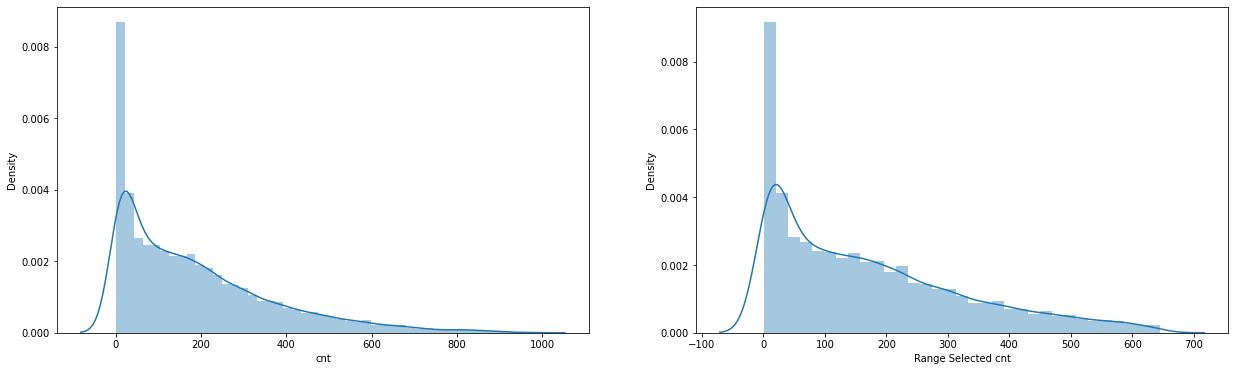

In [84]:
# Melakukan filtering pada data
df_model = df_model[(df_model['cnt'] <= 645)]

# Plot distribusi data sebelum dan sesudah filtering
fig, axes = plt.subplots(1,2, figsize=(21, 6))
sns.distplot(df['cnt'], ax=axes[0])
sns.distplot(df_model['cnt'], ax=axes[1])
axes[0].set_xlabel('cnt')
axes[1].set_xlabel('Range Selected cnt');

In [85]:
# Cek deskriptif statistik kolom 'cnt' setelah filtering
df_model['cnt'].describe()

count    11813.000000
mean       173.384238
std        155.931763
min          1.000000
25%         38.000000
50%        136.000000
75%        267.000000
max        645.000000
Name: cnt, dtype: float64

**Clean Dataset**

In [86]:
# Cek dataset yang sudah bersih
df_model.head()

,hum,weathersit,holiday,season,temp,hr,cnt,weekday,month,year
0,0.62,1,0,4,0.36,16,250,4,12,2011
1,0.64,1,0,2,0.54,4,18,6,6,2012
2,0.53,1,0,2,0.62,23,107,2,6,2011
3,0.87,2,0,2,0.36,8,145,5,3,2012
5,0.72,1,0,4,0.46,0,45,0,10,2012


In [87]:
# Cek kembali info dataset
df_model.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 11813 entries, 0 to 12164
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   hum         11813 non-null  float64 
 1   weathersit  11813 non-null  category
 2   holiday     11813 non-null  int64   
 3   season      11813 non-null  category
 4   temp        11813 non-null  float64 
 5   hr          11813 non-null  int64   
 6   cnt         11813 non-null  int64   
 7   weekday     11813 non-null  category
 8   month       11813 non-null  int64   
 9   year        11813 non-null  int64   
dtypes: category(3), float64(2), int64(5)
memory usage: 773.7 KB


Pada akhirnya, tersisa 11813 baris data yang akan digunakan untuk pemodelan. Ini berarti terdapat 2% data yang tereliminasi sesuai dengan asumsi dan argumen yang disampaikan di proses-proses sebelumnya.

### **Modeling**

In [94]:
# Import library untuk modeling

from sklearn.model_selection import train_test_split, cross_val_score, RandomizedSearchCV, GridSearchCV, KFold

import category_encoders as ce
from sklearn.preprocessing import OneHotEncoder, PolynomialFeatures, KBinsDiscretizer
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from xgboost.sklearn import XGBRegressor
from sklearn.compose import TransformedTargetRegressor

from sklearn.preprocessing import StandardScaler

from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error, mean_absolute_percentage_error

**Encoding**

In [89]:
df_model.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 11813 entries, 0 to 12164
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   hum         11813 non-null  float64 
 1   weathersit  11813 non-null  category
 2   holiday     11813 non-null  int64   
 3   season      11813 non-null  category
 4   temp        11813 non-null  float64 
 5   hr          11813 non-null  int64   
 6   cnt         11813 non-null  int64   
 7   weekday     11813 non-null  category
 8   month       11813 non-null  int64   
 9   year        11813 non-null  int64   
dtypes: category(3), float64(2), int64(5)
memory usage: 773.7 KB


In [90]:
# Mengubah fitur kategorikal menjadi numerikal

transformer = ColumnTransformer([
    ('One Hot', OneHotEncoder(drop='first', handle_unknown='ignore'), ['weathersit', 'season','weekday'])
], remainder='passthrough')

**Data Splitting**

In [91]:
# Memisahkan data independen variabel dengan target
X = df_model.drop(['cnt'], axis=1)
y = df_model['cnt']

**Train and Test Splitting**

In [92]:
# Splitting data training dan test dengan proporsi 70:30
X_train, X_test, y_train, y_test= train_test_split(
    X,
    y,  
    test_size=0.3,
    random_state=2009)

#### **Choose a Benchmark Model**

In [96]:
# Define algoritma yang digunakan
lr = LinearRegression()
knn = KNeighborsRegressor()
dt = DecisionTreeRegressor(random_state=2009)
rf = RandomForestRegressor(random_state=2009)
xgb = XGBRegressor(random_state=2009)

# Pemodelan dilakukan dalam skala logaritmik, namun kemudian di-inverse kembali untuk interpretasi
log_lr = TransformedTargetRegressor(lr, func=np.log, inverse_func=np.exp)
log_knn = TransformedTargetRegressor(knn, func=np.log, inverse_func=np.exp)
log_dt = TransformedTargetRegressor(dt, func=np.log, inverse_func=np.exp)
log_rf = TransformedTargetRegressor(rf, func=np.log, inverse_func=np.exp)
log_xgb = TransformedTargetRegressor(xgb, func=np.log, inverse_func=np.exp)

# Definisi Scaler
scaler = StandardScaler()

# Kandidat algoritma
models = [log_lr, log_knn, log_dt, log_rf, log_xgb]

score_rmse = []
nilai_mean_rmse = []
nilai_std_rmse = []

score_mae = []
nilai_mean_mae = []
nilai_std_mae = []

score_mape = []
nilai_mean_mape = []
nilai_std_mape = []

# Mencari algoritma terbaik berdasarkan nilai MAE
for i in models:
    
    crossval = KFold(n_splits=5, shuffle=True, random_state=1)

    estimator = Pipeline([
        ('transformer', transformer),
        ('scaler', scaler),
        ('model', i)
    ])

    # RMSE
    model_cv_rmse = cross_val_score(
        estimator, 
        X_train, 
        y_train, 
        cv=crossval, 
        scoring='neg_root_mean_squared_error', 
        error_score='raise'
        )

    print(model_cv_rmse, i)

    score_rmse.append(model_cv_rmse)
    nilai_mean_rmse.append(model_cv_rmse.mean())
    nilai_std_rmse.append(model_cv_rmse.std())

    # MAE
    model_cv_mae = cross_val_score(
        estimator, 
        X_train, 
        y_train, 
        cv=crossval, 
        scoring='neg_mean_absolute_error', 
        error_score='raise'
        )

    print(model_cv_mae, i)

    score_mae.append(model_cv_mae)
    nilai_mean_mae.append(model_cv_mae.mean())
    nilai_std_mae.append(model_cv_mae.std())

    # MAPE
    model_cv_mape = cross_val_score(
        estimator, 
        X_train, 
        y_train, 
        cv=crossval, 
        scoring='neg_mean_absolute_percentage_error', 
        error_score='raise'
        )

    print(model_cv_mape, i)

    score_mape.append(model_cv_mape)
    nilai_mean_mape.append(model_cv_mape.mean())
    nilai_std_mape.append(model_cv_mape.std())

[-140.66481163 -143.00848927 -139.28197467 -145.69951023 -154.32374639] TransformedTargetRegressor(func=<ufunc 'log'>, inverse_func=<ufunc 'exp'>,
                           regressor=LinearRegression())
[ -95.15634348  -97.15757405  -95.64982667  -97.69273274 -105.56176696] TransformedTargetRegressor(func=<ufunc 'log'>, inverse_func=<ufunc 'exp'>,
                           regressor=LinearRegression())
[-1.41293558 -1.24869609 -1.42277212 -1.42153365 -1.4007042 ] TransformedTargetRegressor(func=<ufunc 'log'>, inverse_func=<ufunc 'exp'>,
                           regressor=LinearRegression())
[-101.75910335 -105.86763989  -99.70644982 -110.53702403 -116.06035781] TransformedTargetRegressor(func=<ufunc 'log'>, inverse_func=<ufunc 'exp'>,
                           regressor=KNeighborsRegressor())
[-65.69420011 -68.33284986 -66.21858396 -69.18662862 -74.18300313] TransformedTargetRegressor(func=<ufunc 'log'>, inverse_func=<ufunc 'exp'>,
                           regressor=KNeighborsRe

In [97]:
# Evaluasi hasil dari 5 kandidat algoritma yang digunakan kalo weekday onehot
pd.DataFrame({
    'Model': ['Linear Regression', 'KNN Regressor', 'DecisionTree Regressor', 'RandomForest Regressor', 'XGBoost Regressor'],
    'Mean_RMSE': nilai_mean_rmse,
    'Std_RMSE': nilai_std_rmse,
    'Mean_MAE': nilai_mean_mae,
    'Std_MAE': nilai_std_mae,
    'Mean_MAPE': nilai_mean_mape,
    'Std_MAPE': nilai_std_mape
})

,Model,Mean_RMSE,Std_RMSE,Mean_MAE,Std_MAE,Mean_MAPE,Std_MAPE
0,Linear Regression,-144.595706,5.330292,-98.243649,3.776170,-1.381328,0.066783
1,KNN Regressor,-106.786115,5.938299,-68.723053,3.020746,-1.173354,0.107881
2,DecisionTree Regressor,-66.614069,3.828002,-39.279856,2.016847,-0.419450,0.020103
3,RandomForest Regressor,-49.064595,3.641531,-29.632434,1.924376,-0.304830,0.013771
4,XGBoost Regressor,-43.589906,2.925081,-26.596861,1.486055,-0.266885,0.014754


Terdapat perbedaan cukup signifikan antara nilai RMSE dan MAE, di mana nilai RMSE lebih tinggi karena nilai residuals atau error-nya dikuadratkan terlebih dahulu sebelum dirata-ratakan. Hal ini menyebabkan RMSE akan memberikan 'weight' yang lebih tinggi untuk nilai error yang besar. Dengan kata lain, terdapat nilai-nilai error yang besar yang dihasilkan oleh semua algoritma yang digunakan, sehingga ada perbedaan signifikan antara nilai RMSE dan MAE.

- Berdasarkan nilai RMSE, MAE, dan MAPE,  2 model terbaik adalah RandomForest dan XGBoost, hal tersebut terlihat dari nilai rata-rata dan std yang lebih rendah dibandingkan model lainnya.
- Selanjutnya, akan dilakukan prediksi pada test set dengan benchmark model RandomForest dan XGBoost.

**Predict to Test Set with the Benchmark Model**

Prediksi pada test set dengan menggunakan model XGBoost dan RandomForest

In [122]:
# Benchmark 2 model terbaik
models = {
    'RandomForest': TransformedTargetRegressor(RandomForestRegressor(random_state=1), func=np.log, inverse_func=np.exp),
    'XGB': TransformedTargetRegressor(XGBRegressor(random_state=1), func=np.log, inverse_func=np.exp)
}

score_rmse = []
score_mae = []
score_mape = []

# Prediksi pada test set
for i in models:

    model = Pipeline([
        ('transformer', transformer),
        ('scaler', scaler),
        ('model', models[i])
        ])

    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    score_rmse.append(np.sqrt(mean_squared_error(y_test, y_pred)))
    score_mae.append(mean_absolute_error(y_test, y_pred))
    score_mape.append(mean_absolute_percentage_error(y_test, y_pred))

score_before_tuning = pd.DataFrame({'RMSE': score_rmse, 'MAE': score_mae, 'MAPE': score_mape}, index=models.keys())
score_before_tuning

,RMSE,MAE,MAPE
RandomForest,43.667138,26.880957,0.297829
XGB,39.528571,24.836749,0.255728


#### **Hyperparameter Tuning**

Pada tahap ini, kita akan melakukan hyperparameter tuning pada model XGBoost dengan harapan dapat meningkatkan performa model.

In [113]:
# Kedalaman pohon
max_depth = list(np.arange(1, 11))

# Learning rate
learning_rate = list(np.arange(1, 100)/100)

# Jumlah pohon
n_estimators = list(np.arange(100, 201))

# Jumlah baris tiap pohon (% dari total baris train set)
subsample = list(np.arange(2, 10)/10)

# Gamma (min_impurity_decrease)
gamma = list(np.arange(1, 11)) # Semakin besar nilainya, semakin konservatif/simpel modelnya

# Jumlah feature yang digunakan untuk tiap pohon (% dari total kolom train set)
colsample_bytree = list(np.arange(1, 10)/10)

# Alpha (regularization)
reg_alpha = list(np.logspace(-3, 1, 10)) # Semakin besar nilainya, semakin konservatif/simpel modelnya


# Hyperparam space XGboost
hyperparam_space_xgb = {
    'model__max_depth': max_depth, 
    'model__learning_rate': learning_rate,
    'model__n_estimators': n_estimators,
    'model__subsample': subsample,
    'model__gamma': gamma,
    'model__colsample_bytree': colsample_bytree,
    'model__reg_alpha': reg_alpha
}

In [119]:
# Benchmark model dengan hyperparameter tuning
xgb = XGBRegressor(random_state=1, verbosity=0)

# Membuat algorithm chains
estimator_xgb = Pipeline([
        ('transformer', transformer),
        ('scaler', scaler),
        ('model', xgb)
        ])

crossval = KFold(n_splits=5, shuffle=True, random_state=1)

# Hyperparameter tuning
random_xgb = RandomizedSearchCV(
    estimator_xgb, 
    param_distributions = hyperparam_space_xgb,
    n_iter = 50,
    cv = crossval, 
    scoring = ['neg_root_mean_squared_error', 'neg_mean_absolute_error', 'neg_mean_absolute_percentage_error'], 
    n_jobs = -1,
    refit = 'neg_mean_absolute_percentage_error', # Hanya bisa memilih salah stau metric untuk optimisasi
    random_state = 1  
)

In [120]:
# Fitting data training untuk mencari parameter terbaik
random_xgb.fit(X_train, y_train)

RandomizedSearchCV(cv=KFold(n_splits=5, random_state=1, shuffle=True),
                   estimator=Pipeline(steps=[('transformer',
                                              ColumnTransformer(remainder='passthrough',
                                                                transformers=[('One '
                                                                               'Hot',
                                                                               OneHotEncoder(drop='first',
                                                                                             handle_unknown='ignore'),
                                                                               ['weathersit',
                                                                                'season',
                                                                                'weekday'])])),
                                             ('scaler', StandardScaler()),
                                             ('model',
                                              XGBRegressor(base_score=None,
                                                           booster=None,
                                                           call...
                                                             0.007742636826811269,
                                                             0.021544346900318832,
                                                             0.05994842503189409,
                                                             0.1668100537200059,
                                                             0.46415888336127775,
                                                             1.2915496650148828,
                                                             3.593813663804626,
                                                             10.0],
                                        'model__subsample': [0.2, 0.3, 0.4, 0.5,
                                                             0.6, 0.7, 0.8,
                                                             0.9]},
                   random_state=1, refit='neg_mean_absolute_percentage_error',
                   scoring=['neg_root_mean_squared_error',
                            'neg_mean_absolute_error',
                            'neg_mean_absolute_percentage_error'])

In [107]:
# Melihat hasil tuning dalam bentuk dataframe. Diurutkan berdasarkan RMSE, MAE & MAPE
pd.DataFrame(random_xgb.cv_results_).sort_values(by='rank_test_neg_mean_absolute_percentage_error').head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_model__subsample,param_model__reg_alpha,param_model__n_estimators,param_model__max_depth,param_model__learning_rate,param_model__gamma,...,std_test_neg_mean_absolute_error,rank_test_neg_mean_absolute_error,split0_test_neg_mean_absolute_percentage_error,split1_test_neg_mean_absolute_percentage_error,split2_test_neg_mean_absolute_percentage_error,split3_test_neg_mean_absolute_percentage_error,split4_test_neg_mean_absolute_percentage_error,mean_test_neg_mean_absolute_percentage_error,std_test_neg_mean_absolute_percentage_error,rank_test_neg_mean_absolute_percentage_error
7,1.396534,0.059753,0.019523,0.002817,0.9,0.059948,119,8,0.05,5,...,0.491850,1,-0.478122,-0.475180,-0.524183,-0.487421,-0.421813,-0.477344,0.032816,1
17,1.680437,0.043831,0.017394,0.001356,0.6,0.001,190,5,0.04,9,...,1.124150,6,-0.612354,-0.554114,-0.596831,-0.597583,-0.563775,-0.584931,0.022140,2
4,2.472963,0.084585,0.027376,0.001502,0.9,10.0,188,9,0.79,9,...,0.333455,8,-0.714859,-0.600964,-0.648130,-0.701375,-0.630464,-0.659158,0.042934,3
43,1.180168,0.009348,0.015595,0.000800,0.5,0.16681,172,5,0.31,7,...,0.987229,3,-0.675029,-0.598581,-0.646512,-0.727233,-0.738952,-0.677262,0.051854,4
8,1.198159,0.037357,0.017794,0.000748,0.7,0.021544,182,6,0.31,2,...,0.764090,2,-0.734688,-0.633373,-0.664875,-0.727555,-0.639052,-0.679908,0.043201,5


In [108]:
# Cek skor dan params terbaik
print('XGBoost')
print('Best_score:', random_xgb.best_score_)
print('Best_params:', random_xgb.best_params_)

XGBoost
Best_score: -0.47734366183246735
Best_params: {'model__subsample': 0.9, 'model__reg_alpha': 0.05994842503189409, 'model__n_estimators': 119, 'model__max_depth': 8, 'model__learning_rate': 0.05, 'model__gamma': 5, 'model__colsample_bytree': 0.8}


**Predict to Test Set with the Tuned Model**

Melakukan prediksi pada test set dengan menggunakan model XGBoost dan hyperparameter terpilih.

In [110]:
# Model XGBoost
model = {'XGB': TransformedTargetRegressor(XGBRegressor(random_state=1), func=np.log, inverse_func=np.exp)}

# Define model terhadap estimator terbaik
xgb_tuning = random_xgb.best_estimator_

# Fitting model
xgb_tuning.fit(X_train, y_train)

# Predict test set
y_pred_xgb_tuning = xgb_tuning.predict(X_test)

# Simpan nilai metrics RMSE, MAE & MAPE setelah tuning
rmse_xgb_tuning = np.sqrt(mean_squared_error(y_test, y_pred_xgb_tuning))
mae_xgb_tuning = mean_absolute_error(y_test, y_pred_xgb_tuning)
mape_xgb_tuning = mean_absolute_percentage_error(y_test, y_pred_xgb_tuning)

score_after_tuning = pd.DataFrame({'RMSE': rmse_xgb_tuning, 'MAE': mae_xgb_tuning, 'MAPE': mape_xgb_tuning}, index=model.keys())
score_after_tuning

,RMSE,MAE,MAPE
XGB,42.987601,27.080498,0.390707


**Performance Comparison**

Perbandingan performa model XGBoost sebelum dan sesudah dilakukan hyperparameter tuning.

In [111]:
# Sebelum hyperparameter tuning
pd.DataFrame(score_before_tuning.loc['XGB']).T

,RMSE,MAE,MAPE
XGB,39.528571,24.836749,0.255728


In [112]:
# Setelah hyperparameter tuning
score_after_tuning

,RMSE,MAE,MAPE
XGB,42.987601,27.080498,0.390707


Model mengalami penurunan performa (nilai RMSE, MAE & MAPE meningkat) dengan dilakukannya hyperparameter tuning.
- RMSE, MAE & MAPE sebelum tuning: 39.52, 24.83, 0.255
- RMSE, MAE & MAPE setelah tuning: 42.98, 27.08, 0.399

Berdasarkan perbandingan di atas, maka model akhir yang dipilih ialah XGBoost before tuning. Penerapan hyperparameter tuning pada kasus ini belum dapat memberikan dampak yang baik. penerapan dengan pilihan parameter yang lebih banyak / menggunakan metode hyperparameter yang lain mungkin saja dapat meningkatkan score model ini.

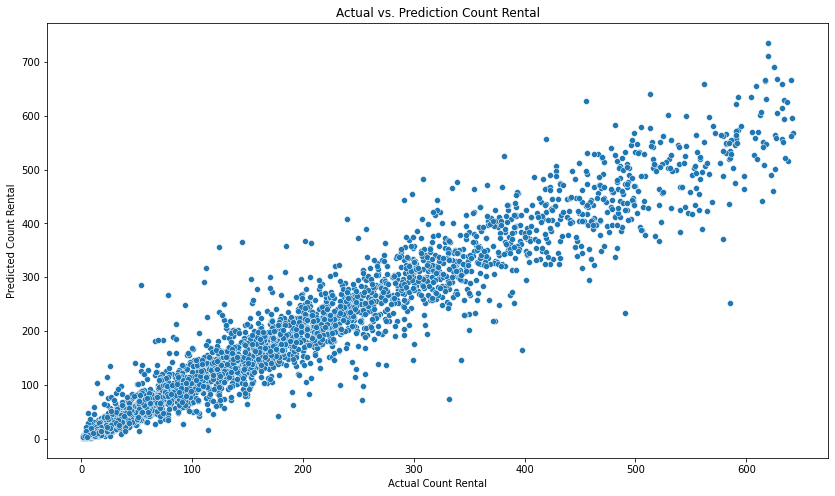

In [123]:
plt.figure(figsize=(14, 8))
plot = sns.scatterplot(x=y_test, y=y_pred).set(title='Actual vs. Prediction Count Rental', 
                                               xlabel='Actual Count Rental', 
                                               ylabel='Predicted Count Rental');

Adanya nilai-nilai error yang besar membuat perbedaan yang cukup signifikan antara nilai RMSE dan MAE. Hal ini dapat tergambarkan pula pada plot di atas, di mana terdapat jumlah rental aktual yang rendah tapi diprediksi jauh lebih tinggi (overestimation), dan juga sebaliknya (underestimation). Selain itu, nilai MAPE yang didapat, yaitu sekitar 25% menjadikan model ini dapat dikategorikan ke dalam 'reasonable forecasting' (Lewis, 1982).

*Source: Lewis, C. D. (1982). Industrial and business forecasting methods: A practical guide to exponential smoothing and curve fitting*

<AxesSubplot:title={'center':'Feature Importances'}>

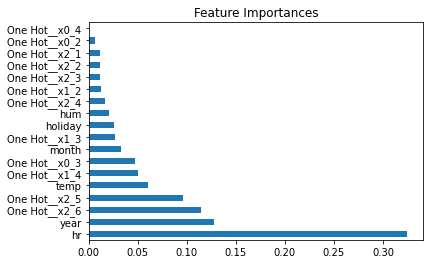

In [125]:
# Plot feature importances
feature_imp = pd.Series(xgb_tuning['model'].feature_importances_,transformer.get_feature_names()).sort_values(ascending = False)
feature_imp.plot(kind='barh', title='Feature Importances')

Berdasarkan grafik feature imporances di atas, dapat diketahui bahwa tiga fitur yang sangat berpengaruh terhadap jumlah rental sepeda adalah jam (hr), year (tahun), dan weekday (hari)

### **Conclusion**



*   Berdasarkan pemodelan yang telah dilakukan, jam merupakan fitur yang paling berpengaruh terhadap jumlah rental sepeda, dilanjutkan dengan tahun dan hari.
*   Metrik evaluasi yang digunakan pada model adalah nilai RMSE, MAE & MAPE. Jika ditinjau dari nilai RMSE yang dihasilkan oleh model, yaitu sebesar 42.9, kita dapat menyimpulkan bahwa bila nanti model yang kita buat ini digunakan untuk memperkirakan jumlah rental sepeda baru pada rentang nilai seperti yang dilatih terhadap model (maksimal jumlah rental sepeda 645), maka perkiraan jumlah rental sepedanya rata-rata akan meleset kurang lebih sebesar 42.9 dari jumlah rental sepeda yang mungkin seharusnya. Tetapi, tidak menutup kemungkinan juga prediksinya meleset lebih jauh karena bias yang dihasilkan model masih cukup tinggi bila dilihat dari visualisasi antara jumlah rental sepeda aktual dan prediksi.

### **Recommendation**

Hal-hal yang dapat dilakukan untuk mengembangkan model agar lebih baik lagi, seperti:

1. Melakukan pengelompokan terhadap prediksi yang nilai error yang tinggi baik yang bersifat overestimation dan underestimation. Selanjutnya, kita dapat mmemeriksa hubungan antara error tersebut dengan tiap variabel independen. Hal tersebut dilakukan untuk mengetahui variabel mana saja dan aspek apa yang menyebabkan model menghasilkan error yang tinggi.
<br><br>   
1. Model memerlukan penambahan fitur yang lebih korelatif dengan jumlah rental sepeda, terkait karakteristik perilaku pengguna, lokasi, dan biaya rental sepeda. Selain itu, penambahan data terkini terkait rental sepeda juga dapat meningkatkan kualitas model.
<br><br>   


#### **Save Model**

In [129]:
#Save model
import pickle

pickle.dump(xgb_tuning, open('Model_Bikesharing_XGB.sav', 'wb'))

In [127]:
#Load model
filename = 'Model_Bikesharing_XGB.sav'
loaded_model = pickle.load(open(filename, 'rb'))

In [128]:
np.sqrt(mean_squared_error(y_test, loaded_model.predict(X_test)))

42.98760097551463